# Label Encoding

Label Encoding is a technique used to convert categorical data into numerical data. It is particularly useful when you have categorical features in your dataset that need to be represented as numbers to be used in machine learning models.

How Does Label Encoding Work?
Label encoding assigns each unique category of a feature to an integer. For example, if a feature contains the values ['red', 'green', 'blue'], label encoding will convert them into integers as follows:

'red' → 0
'green' → 1
'blue' → 2

In [100]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# This will suppress all warnings
import warnings
warnings.filterwarnings('ignore')  

### Load dataset

In [103]:
data=pd.read_csv('data/homeprice_1.csv')
data.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,61000
3,monroe township,3600,680000
4,monroe township,4000,725000


### Label encoder

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [106]:
lb=LabelEncoder()
data['town']=lb.fit_transform(data['town'])
data['town']

0     0
1     0
2     0
3     0
4     0
5     2
6     2
7     2
8     2
9     1
10    1
11    1
12    1
Name: town, dtype: int32

In Label Encoding,we dont need to join it seprately.

In [108]:
data.head()

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,61000
3,0,3600,680000
4,0,4000,725000


### Spliting the Data into Multiple Inputs(X) & One Target(Y) variables

In [110]:
X=data.drop('price',axis=1)
X.head()

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000


In [111]:
Y=data['price']
Y.head()

0    550000
1    565000
2     61000
3    680000
4    725000
Name: price, dtype: int64

### Spliting the data into test data & train data

In [113]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

### Linear Regression Modeling

In [115]:
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

### Predictions

In [117]:
y_pred=mlr.predict(x_test)
y_pred

array([609670.05076142, 655659.89847716, 701649.74619289])

### r2 score

In [119]:
r2=r2_score(y_test,y_pred)
r2

-0.0973843982711371

### Model coefficients & Intercept

In [121]:
print("Coefficient:",mlr.coef_) #m
print("Intercept:",mlr.intercept_) #C

Coefficient: [23895.93908629   114.97461929]
Intercept: 241751.26903553284


### Visualization of actual & predicted values

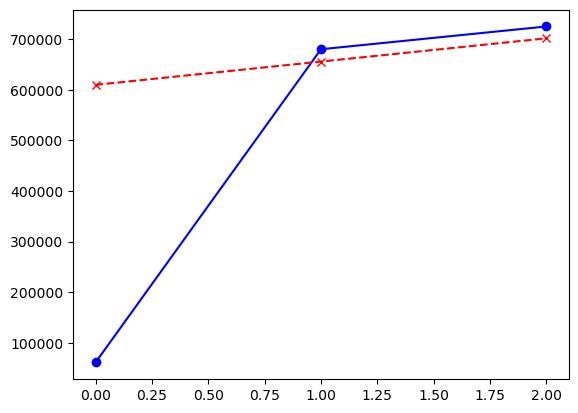

In [123]:
# Plotting actual values (y_test) with a line (blue)
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Values', linestyle='-', marker='o')

# Plotting predicted values (y_pred) with a line (red)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Values', linestyle='--', marker='x')


### Creating DataFrame to view Results

In [125]:
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))

if len(y_test) == len(y_pred):
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(results_df)
else:
    print("Mismatch in the length of actual and predicted values")

Length of y_test: 3
Length of y_pred: 3
   Actual      Predicted
2   61000  609670.050761
3  680000  655659.898477
4  725000  701649.746193


### Performance Metrics for Regression Models: MAE, MSE, and RMSE

In [127]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

198786.80203045683
100725499832.51306
317372.808905415


### r2 value calculations

In [129]:
r2=r2_score(y_test,y_pred)
r2

-0.0973843982711371

### Conclusion

In [131]:
print("\nConclusion:")
if r2 > 0.9:
    print(f"The model performs excellently with an R-squared value of {r2:.4f}. It explains over 90% of the variance in the target variable.")
else:
    print(f"The model's performance is moderate with an R-squared value of {r2:.4f}. Consider improving the model by adding more features or using more advanced techniques.")



Conclusion:
The model's performance is moderate with an R-squared value of -0.0974. Consider improving the model by adding more features or using more advanced techniques.


In [132]:
# END